# **Assignment for week 5**
*For this assignment you will have to complete the code where I commented "#TODO:", run the code and submit file on Plato*


*Good luck!*

### AI programming
### CB2001103-062

Student ID: 202400391

Name: Jathavaan Shankarr

In [118]:

# Import necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis
import seaborn as sns  # Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split  # Function to split the dataset into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, \
    classification_report  # Metrics for model evaluation
import warnings  # Library to handle warnings
import os

In this step, you will import the necessary libraries for data manipulation, visualization, and model evaluation.

This setup is crucial for performing data analysis and machine learning tasks.

In [119]:
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

# **Part 1: Classification exercise using Iris Dataset**

In this assignment, you will explore the Iris dataset, visualize relationships among features, prepare the data for classification, and build a K-Nearest Neighbors (KNN) classifier.
You will also evaluate the model's performance using various metrics. This exercise will enhance your understanding of classification algorithms and data analysis.

In [120]:
FILENAME: str = "iris.csv"
ROOT_DIR: str = os.path.join(os.getcwd(), os.pardir)
FILE_PATH: str = os.path.join(ROOT_DIR, "resources", FILENAME)
iris = pd.read_csv(filepath_or_buffer=FILE_PATH)
print("Iris Dataset:")
iris.head()

Iris Dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [121]:
print("\nSummary Statistics:")  # Print a message for summary statistics
iris.describe()


Summary Statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [122]:
numer_of_nan_values = iris.isna().values.sum()
print(f"Number of NaN values: {numer_of_nan_values}")

Number of NaN values: 0


Here, you will load the Iris dataset from a CSV file into a Pandas DataFrame.
 Loading the data allows you to analyze it effectively.

The `.head()` function displays the first few rows, providing an overview of the dataset's structure and features.

In [123]:
# TODO: Display the first five rows of the 'species' column to check the species data
iris[["species"]].head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


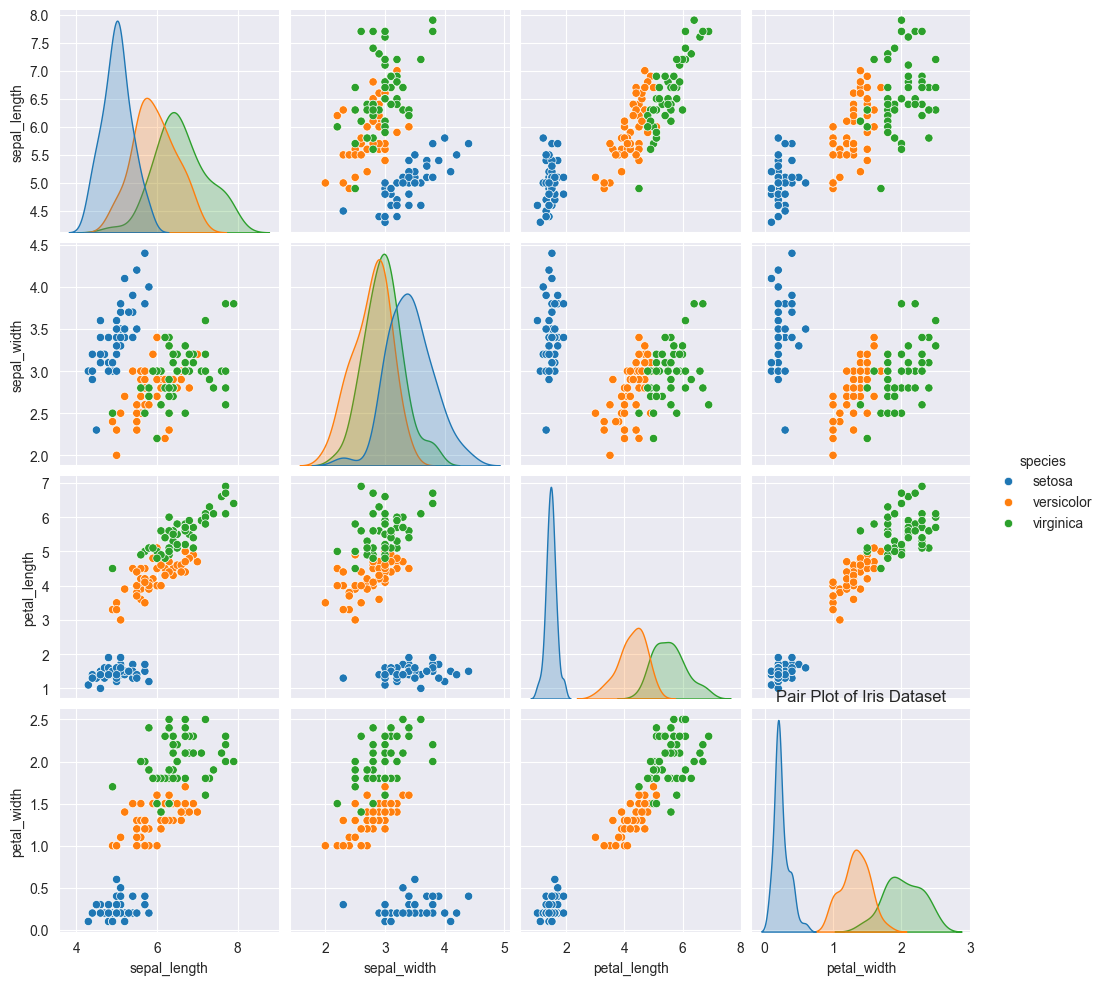

In [124]:
# TODO: Create a pairplot of the iris dataset to visualize relationships between all features,
sns.pairplot(iris, hue="species")
plt.title('Pair Plot of Iris Dataset')
plt.show()

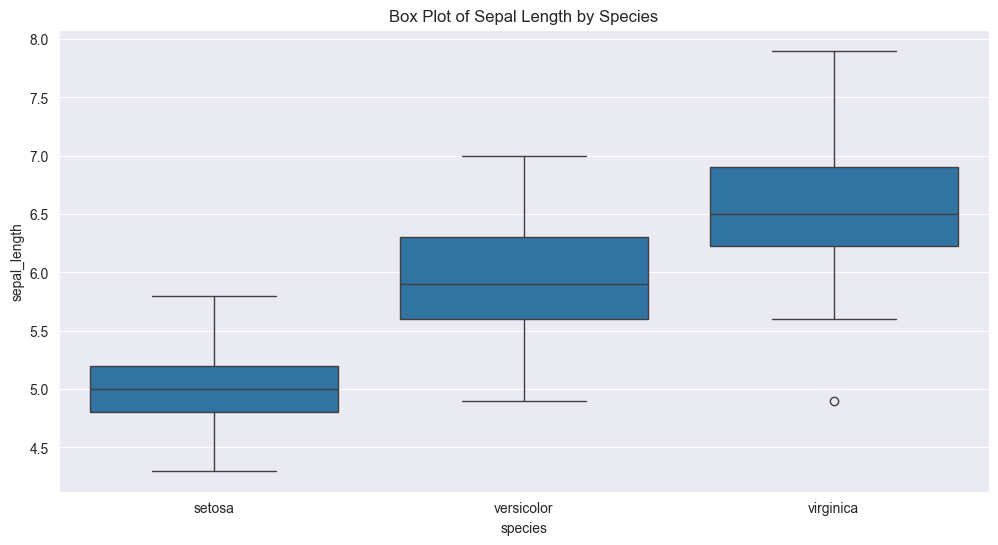

In [125]:
plt.figure(figsize=(12, 6))
# TODO: Create a box plot showing the distribution of sepal length across different species (seaborn)
sns.boxplot(x="species", y="sepal_length", data=iris)
plt.title('Box Plot of Sepal Length by Species')
#TODO: Show the box plot
plt.show()

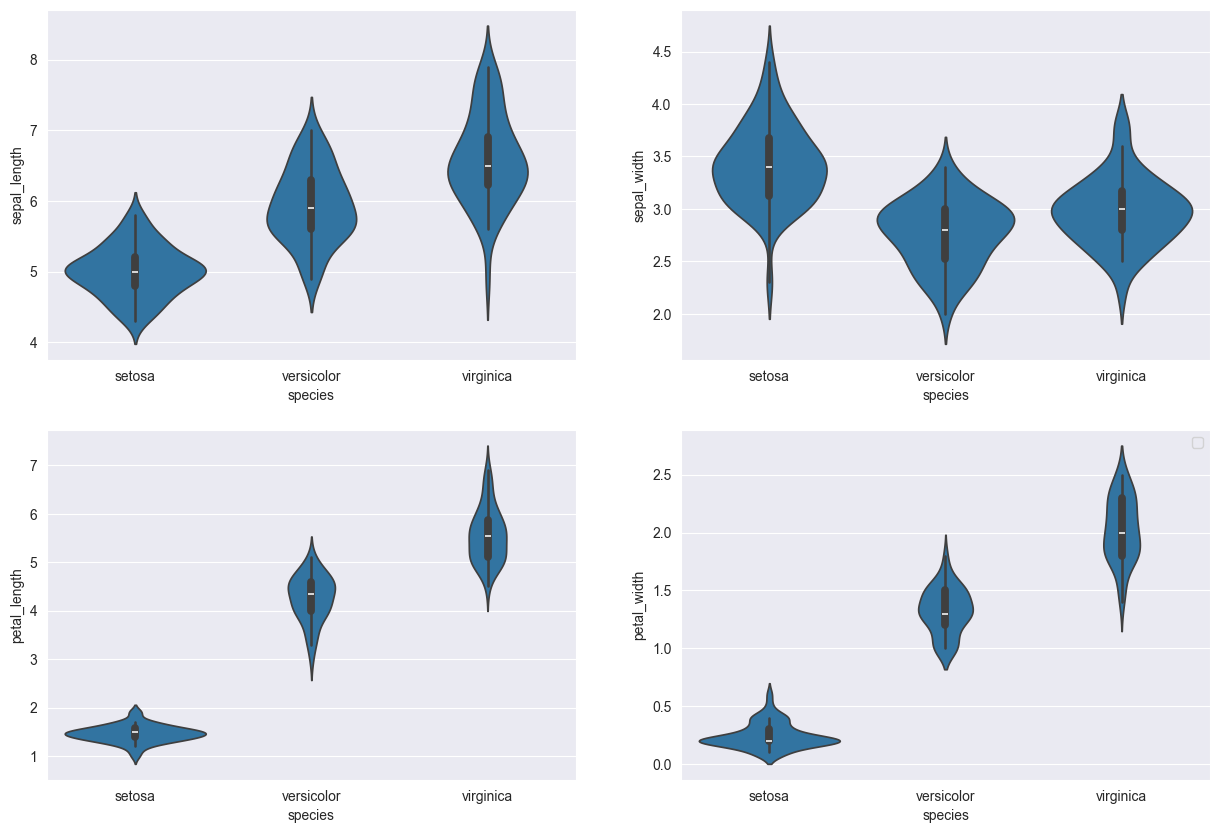

In [126]:
plt.figure(figsize=(15, 10))  # Create a new figure for the violin plots with larger size

# TODO: Create a subplot (2 rows, 2 columns, 1st plot)
plt.subplot(2, 2, 1, label="Sepal length")
sns.violinplot(data=iris, x="species", y="sepal_length")
plt.subplot(2, 2, 2, label="Sepal length")
sns.violinplot(data=iris, x="species", y="sepal_width")
plt.subplot(2, 2, 3, label="Sepal length")
sns.violinplot(data=iris, x="species", y="petal_length")
plt.subplot(2, 2, 4, label="Sepal length")
sns.violinplot(data=iris, x="species", y="petal_width")
plt.legend()
plt.show()

In [127]:
# TODO: Split the dataset into train (70%) and test (30%) sets
test_size = 0.3
seed = 42
train, test = train_test_split(iris, test_size=test_size, random_state=seed)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [128]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # taking the training data features
train_y = train.species  # output of the training data

test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # taking test data feature
test_y = test.species  # output value of the test data

In [129]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [130]:
test_X.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


# For Classification model we will use seaborn and KNN classifier

In [131]:
# TODO: Initialize the k-Nearest Neighbors (k-NN) classifier with k=3 (3 neighbors)
neighbours = 3
knn = KNeighborsClassifier(n_neighbors=neighbours)
# TODO: Train the k-NN model on the training data (train_X and train_y) using seaborn fit method
knn.fit(train_X, train_y)
# TODO: Predict the species for the test dataset using the trained k-NN model (knn.predict)
pred_y = knn.predict(test_X)

In [132]:
# Evaluation
print("\nClassification Evaluation:")
accuracy = sum(1 for pred, actual in zip(pred_y, test_y) if pred == actual) / float(len(pred_y)) * 100
print(f"Accuracy: {accuracy:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(test_y, pred_y))
print("\nClassification Report:\n", classification_report(test_y, pred_y))


Classification Evaluation:
Accuracy: 100.00%

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Part 2: Linear regression exercise using Boston housing dataset

In [133]:
FILENAME = "housing.csv"
FILE_PATH = os.path.join(ROOT_DIR, "resources", FILENAME)
boston_housing = pd.read_csv(filepath_or_buffer=FILE_PATH)  #TODO: Load the Boston Housing Dataset
print("Boston Housing Dataset:")
#TODO: Display the first 5 rows of the dataset
boston_housing.head()

Boston Housing Dataset:


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [134]:
# Step 2: Data Exploration
print("\nSummary Statistics:")
# TODO: # Display the summary statistics of the dataset (e.g., mean, std, min, max)
boston_housing.describe()


Summary Statistics:


,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [135]:
# TODO: # Check for any missing values in the dataset
numer_of_nan_values = boston_housing.isna().values.sum()
print(f"Number of NaN values: {numer_of_nan_values}")

Number of NaN values: 0


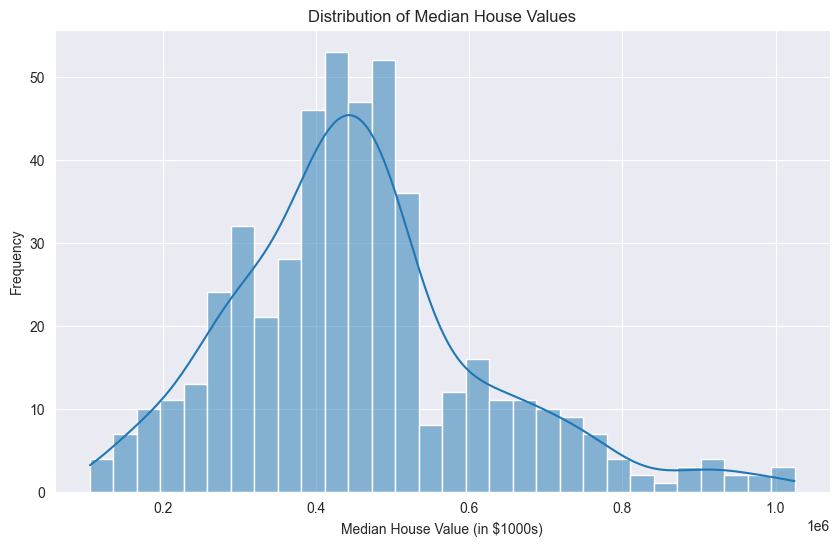

In [136]:
# Step 3: Data Visualization
# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
# TODO:  Create a histogram with 30 bins and a KDE plot for 'MEDV' (Hint: use seaborn histogram)
sns.histplot(data=boston_housing, x='MEDV', bins=30, kde=True)
plt.title('Distribution of Median House Values')  # Set the plot title
plt.xlabel('Median House Value (in $1000s)')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
# TODO: Show the plot
plt.show()

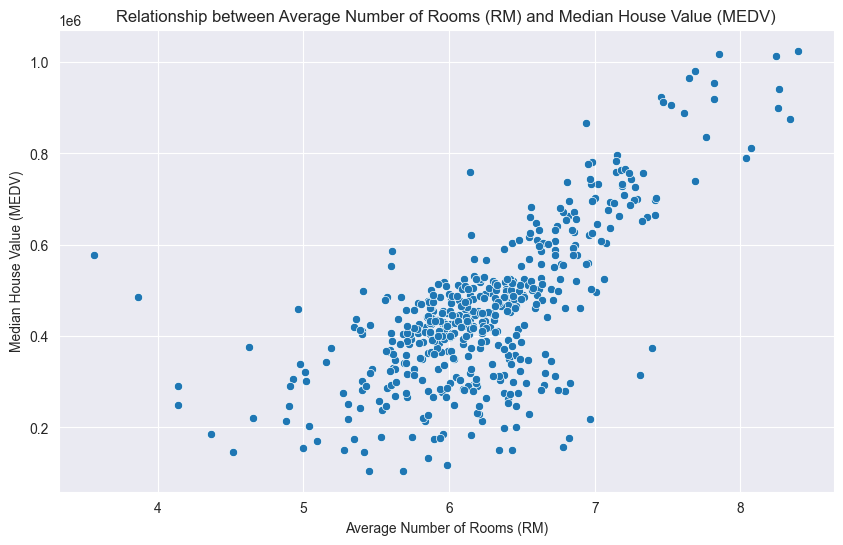

In [137]:
# Scatter plot to visualize relationship between features and target variable
plt.figure(figsize=(10, 6))  # Set the figure size for the scatter plot
# TODO: Create scatter plot between 'RM' (rooms) and 'MEDV' Hint: use seaborn scatterplot, x equals 'RM' & y equals 'MEDV'
sns.scatterplot(data=boston_housing, x='RM', y='MEDV')
plt.title('Relationship between Average Number of Rooms (RM) and Median House Value (MEDV)')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Value (MEDV)')
#TODO: Show the plot
plt.show()

In [138]:
# Step 4: Data Preparation
# Splitting the dataset into features and target variable
# Features (Drop the 'MEDV' column from the dataset, as it is the target variable)
X = boston_housing.drop('MEDV', axis=1)
y = boston_housing.MEDV  #TODO: Assign 'MEDV' as the target variable

In [139]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
# Step 5: Build the Linear Regression Model
# Initialize and fit the linear regression model
lin_reg = LinearRegression()  #TODO: # Create a Linear Regression object
#TODO: Train the linear regression model on the training data. Hint: use .fit method (scikit-learn)
lin_reg.fit(X_train, y_train)

LinearRegression()

In [141]:
# Make predictions
y_pred = lin_reg.predict(X_test)  #TODO: Use the model to predict target values for the test data (X_test)

In [142]:
# Step 6: Model Evaluation
# Evaluate the model performance
print("\nRegression Evaluation:")
print("R-squared:", r2_score(y_test, y_pred))
#TODO: Print Mean Absolute Error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
#TODO: Print Mean Squared Error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Regression Evaluation:
R-squared: 0.6910052678184768
Mean Absolute Error: 63313.497372341524
Mean Squared Error: 7048219280.217693


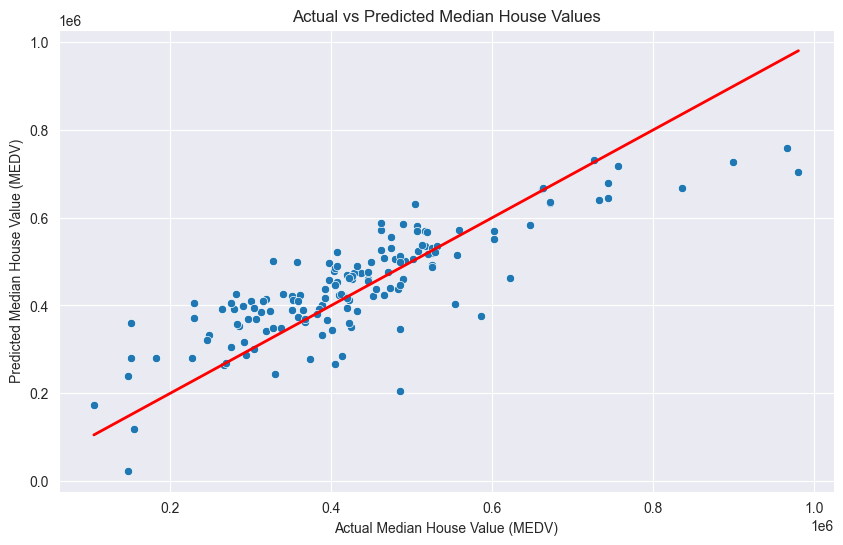

In [143]:
# Visualizing the predictions vs actual values
plt.figure(figsize=(10, 6))
#TODO: Create a scatter plot of actual vs predicted values (y values)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Median House Values')
plt.xlabel('Actual Median House Value (MEDV)')
plt.ylabel('Predicted Median House Value (MEDV)')
#TODO: Show the plot
plt.show()